<a href="https://colab.research.google.com/github/SejalLambat19/Machine-Learning/blob/main/newpr1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install numpy pandas matplotlib seaborn tensorflow


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [4]:
# Load the dataset
from google.colab import files
uploaded = files.upload()
# Function to load CSV file using Pandas
import pandas as pd
dataset = pd.read_csv('Titanic-Dataset pract1.csv')
dataset.head()

Saving Titanic-Dataset pract1.csv to Titanic-Dataset pract1 (1).csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Check for nulls
print(dataset.isnull().sum())

# Encode categorical labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# The Titanic dataset does not have a 'species' column.
# Assuming the goal was to encode the 'Sex' column as an example of categorical encoding.
# Replace 'species' with the actual column name you want to encode, e.g., 'Sex'.
# If there is no categorical column to encode for your task, you can remove this section.
# dataset['species'] = le.fit_transform(dataset['species']) # Original line with error

# Example: Encoding the 'Sex' column
if 'Sex' in dataset.columns:
    dataset['Sex'] = le.fit_transform(dataset['Sex'])
    # Split features and label
    # Assuming you want to predict 'Survived' if this is the Titanic dataset.
    # Replace 'species' with the actual target column name, e.g., 'Survived'.
    # If there is no target column for your task, you can adjust this section accordingly.
    # X = dataset.drop('species', axis=1) # Original line with error
    # y = dataset['species'] # Original line with error

    if 'Survived' in dataset.columns:
        X = dataset.drop('Survived', axis=1)
        y = dataset['Survived']
    else:
         # If no 'Survived' column, you might be doing unsupervised learning or need a different target.
         # Adjust this part based on your specific goal and dataset columns.
         print("Warning: 'Survived' column not found. Adjusting feature/label split.")
         # Example: Dropping a different column or no column for X and choosing a different y
         # X = dataset.drop('PassengerId', axis=1) # Example: Dropping a non-predictive column
         # y = dataset['Pclass'] # Example: Using another column as a target (adjust as needed)
         # For now, we will not split into X and y if 'Survived' is missing to avoid further errors.
         X = None
         y = None


    # Train-test split
    from sklearn.model_selection import train_test_split

    if X is not None and y is not None:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    else:
        print("Skipping train-test split due to missing target column.")

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


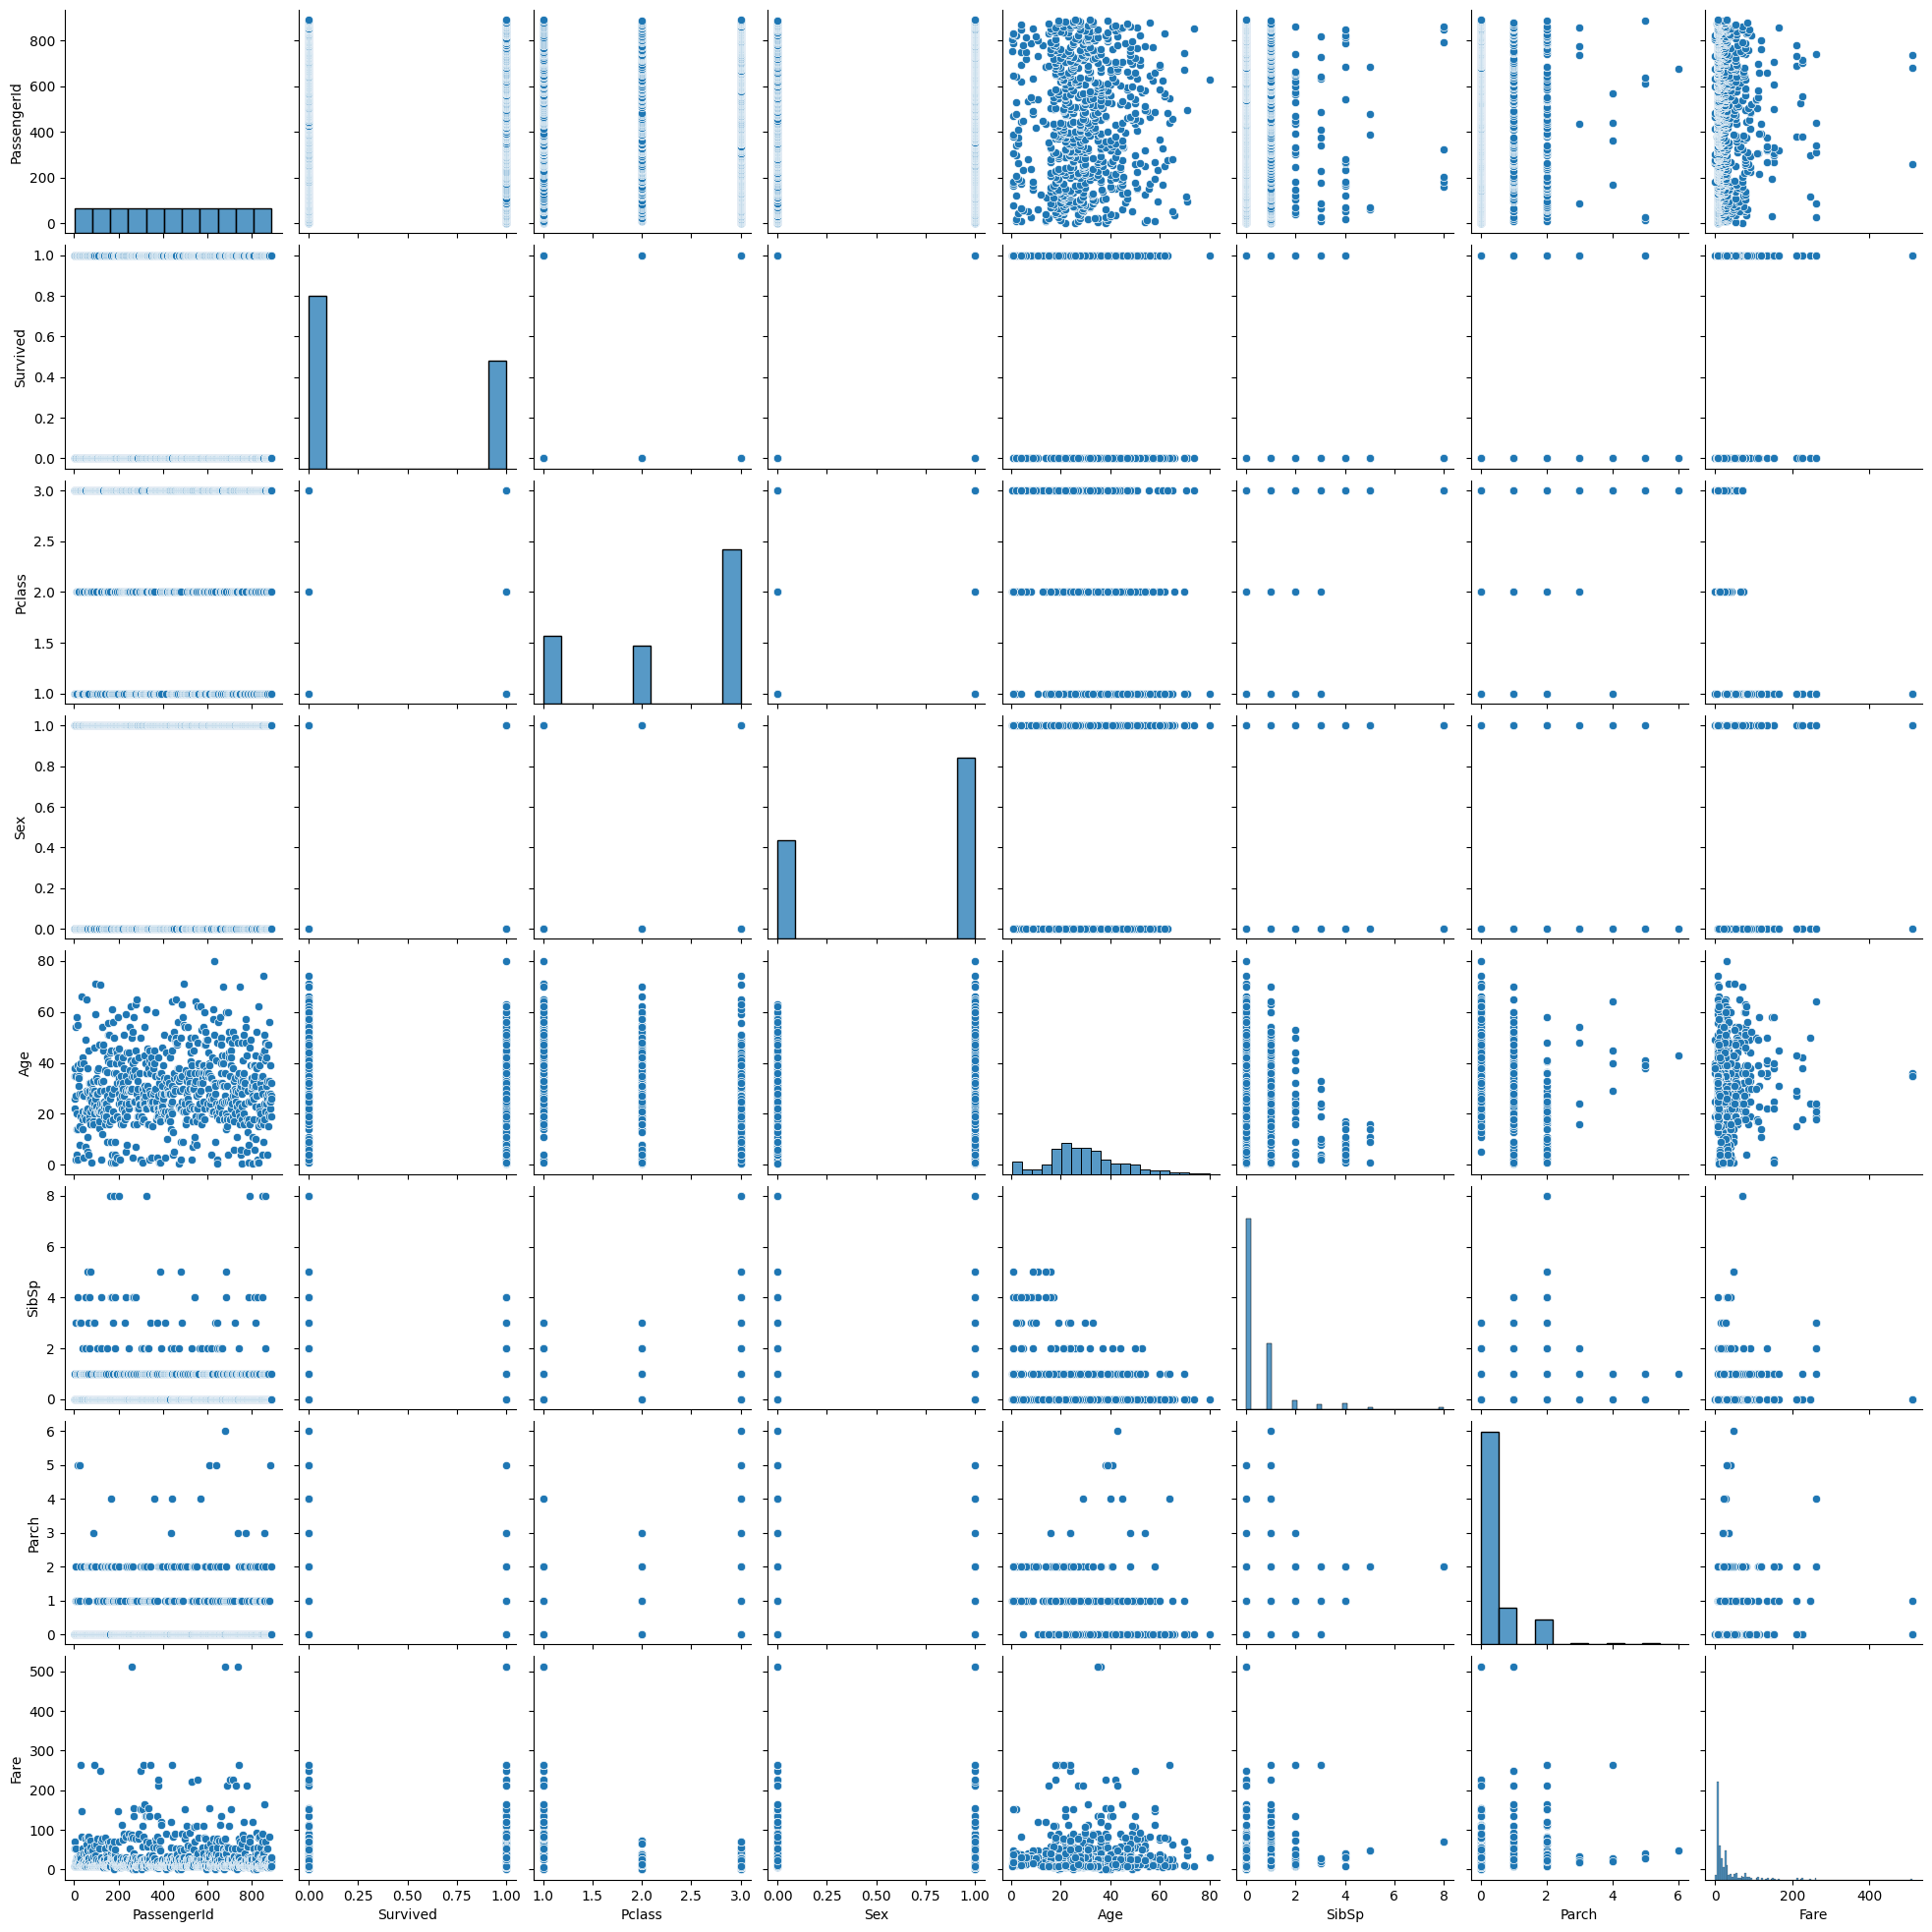

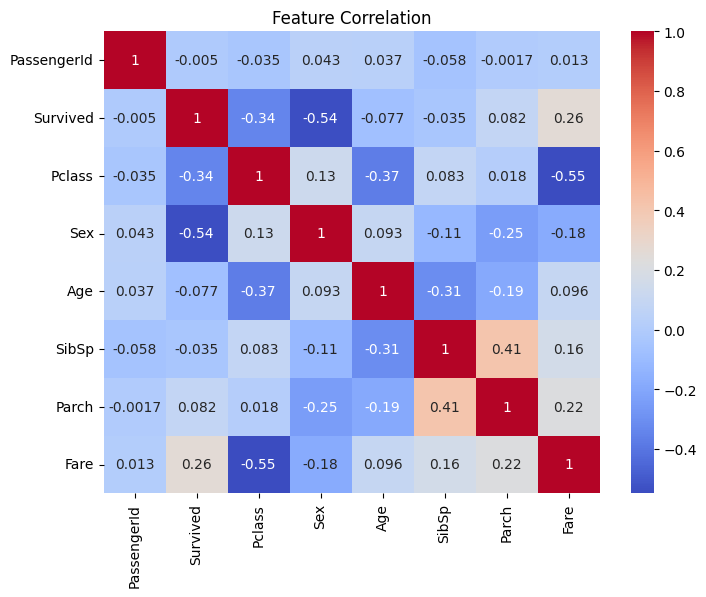

In [9]:
# Visualize feature distribution
# Changed 'df' to 'dataset'
# Also, the Titanic dataset does not have a 'species' column.
# If you want to visualize based on a categorical column like 'Survived' or 'Pclass',
# replace 'species' with the appropriate column name.
# For example, to color points by 'Survived':
# sns.pairplot(dataset, hue='Survived')
# Since 'species' is not in the dataset and was likely a placeholder,
# we will remove the 'hue' argument for a general pairplot or replace it with a valid column.
# Let's remove 'hue' for now to avoid another potential error if the intended hue column is also missing.
sns.pairplot(dataset)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
# Changed 'df' to 'dataset'
# Select only numeric columns before calculating correlation
numeric_dataset = dataset.select_dtypes(include=np.number)
sns.heatmap(numeric_dataset.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [10]:
# Define the model
model = keras.Sequential([
    layers.Dense(10, activation='relu', input_shape=(X.shape[1],)),
    layers.Dense(8, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 classes for Iris
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235 (940.00 B)

 Trainable params: 235 (940.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Check for nulls
print(dataset.isnull().sum())

# Encode categorical labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# The Titanic dataset does not have a 'species' column.
# Assuming the goal was to encode the 'Sex' column as an example of categorical encoding.
# Replace 'species' with the actual column name you want to encode, e.g., 'Sex'.
# If there is no categorical column to encode for your task, you can remove this section.
# dataset['species'] = le.fit_transform(dataset['species']) # Original line with error

# Example: Encoding the 'Sex' column
if 'Sex' in dataset.columns:
    dataset['Sex'] = le.fit_transform(dataset['Sex'])
    # Split features and label
    # Assuming you want to predict 'Survived' if this is the Titanic dataset.
    # Replace 'species' with the actual target column name, e.g., 'Survived'.
    # If there is no target column for your task, you can adjust this section accordingly.
    # X = dataset.drop('species', axis=1) # Original line with error
    # y = dataset['species'] # Original line with error

    if 'Survived' in dataset.columns:
        X = dataset.drop('Survived', axis=1)
        y = dataset['Survived']
    else:
         # If no 'Survived' column, you might be doing unsupervised learning or need a different target.
         # Adjust this part based on your specific goal and dataset columns.
         print("Warning: 'Survived' column not found. Adjusting feature/label split.")
         # Example: Dropping a different column or no column for X and choosing a different y
         # X = dataset.drop('PassengerId', axis=1) # Example: Dropping a non-predictive column
         # y = dataset['Pclass'] # Example: Using another column as a target (adjust as needed)
         # For now, we will not split into X and y if 'Survived' is missing to avoid further errors.
         X = None
         y = None

    # Drop non-numeric columns from features (X)
    if X is not None:
        # Identify non-numeric columns
        non_numeric_cols = X.select_dtypes(include='object').columns
        # Drop identified columns
        X = X.drop(columns=non_numeric_cols)


    # Train-test split
    from sklearn.model_selection import train_test_split

    if X is not None and y is not None:
        # Before splitting, handle potential missing values in X.
        # A simple approach is to fill NaN with the mean or median of the column.
        # For demonstration, using mean fill here. Consider other strategies if needed.
        X = X.fillna(X.mean())
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    else:
        print("Skipping train-test split due to missing target column or issues with features.")

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [14]:
# Define the model for binary classification (Titanic)
model = keras.Sequential([
    layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)), # Use X_train.shape[1]
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # 1 output neuron for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy', # Use binary crossentropy for binary classification
              metrics=['accuracy'])

# Summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 10)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 177 (708.00 B)

 Trainable params: 177 (708.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Check for nulls
print(dataset.isnull().sum())

# Encode categorical labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# The Titanic dataset does not have a 'species' column.
# Assuming the goal was to encode the 'Sex' column as an example of categorical encoding.
# Replace 'species' with the actual column name you want to encode, e.g., 'Sex'.
# If there is no categorical column to encode for your task, you can remove this section.
# dataset['species'] = le.fit_transform(dataset['species']) # Original line with error

# Example: Encoding the 'Sex' column
if 'Sex' in dataset.columns:
    dataset['Sex'] = le.fit_transform(dataset['Sex'])
    # Split features and label
    # Assuming you want to predict 'Survived' if this is the Titanic dataset.
    # Replace 'species' with the actual target column name, e.g., 'Survived'.
    # If there is no target column for your task, you can adjust this section accordingly.
    # X = dataset.drop('species', axis=1) # Original line with error
    # y = dataset['species'] # Original line with error

    if 'Survived' in dataset.columns:
        X = dataset.drop('Survived', axis=1)
        y = dataset['Survived']
    else:
         # If no 'Survived' column, you might be doing unsupervised learning or need a different target.
         # Adjust this part based on your specific goal and dataset columns.
         print("Warning: 'Survived' column not found. Adjusting feature/label split.")
         # Example: Dropping a different column or no column for X and choosing a different y
         # X = dataset.drop('PassengerId', axis=1) # Example: Dropping a non-predictive column
         # y = dataset['Pclass'] # Example: Using another column as a target (adjust as needed)
         # For now, we will not split into X and y if 'Survived' is missing to avoid further errors.
         X = None
         y = None

    # Drop non-numeric columns from features (X)
    if X is not None:
        # Identify non-numeric columns
        non_numeric_cols = X.select_dtypes(include='object').columns
        # Drop identified columns
        X = X.drop(columns=non_numeric_cols)


    # Train-test split
    from sklearn.model_selection import train_test_split

    if X is not None and y is not None:
        # Before splitting, handle potential missing values in X.
        # A simple approach is to fill NaN with the mean or median of the column.
        # For demonstration, using mean fill here. Consider other strategies if needed.
        X = X.fillna(X.mean())
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    else:
        print("Skipping train-test split due to missing target column or issues with features.")

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [18]:
# Define the model for binary classification (Titanic)
model = keras.Sequential([
    layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)), # Use X_train.shape[1]
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # 1 output neuron for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy', # Use binary crossentropy for binary classification
              metrics=['accuracy'])

# Summary
model.summary()

# Train the model and store the training history
# You need to define the number of epochs and batch size
epochs = 50  # Example value, adjust as needed
batch_size = 32 # Example value, adjust as needed
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 177 (708.00 B)

 Trainable params: 177 (708.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6125 - loss: 13.4503 - val_accuracy: 0.5810 - val_loss: 5.8866
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6213 - loss: 4.4188 - val_accuracy: 0.5922 - val_loss: 1.1643
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5401 - loss: 1.4519 - val_accuracy: 0.6145 - val_loss: 0.8431
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5493 - loss: 1.0245 - val_accuracy: 0.5475 - val_loss: 0.7441
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5077 - loss: 0.8025 - val_accuracy: 0.5196 - val_loss: 0.6994
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4910 - loss: 0.7509 - val_accuracy: 0.4916 - val_loss: 0.7027
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4789 - loss: 0.7319 - val_accuracy: 0.4804 - val_loss: 0.7045
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4955 - loss: 0.7011 - val_accuracy: 0.5754 - val_los

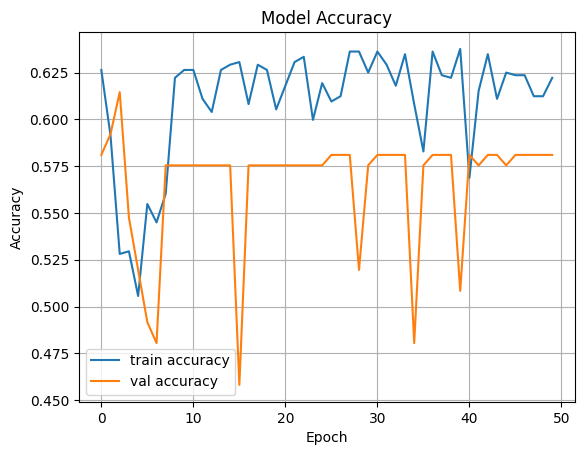

In [19]:
# Now you can plot the history
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()